# **MACHINE LEARNING**

Machine Learning is a branch of Artificial Intelligence that enables computers to learn from data and make predictions or decisions without being explicitly programmed.

## **SUPERVISED LEARNING**

Supervised Learning is a type of Machine Learning where the model is trained on labeled data, allowing it to learn the relationship between input and output to make accurate predictions.

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.tree import plot_tree

In [ ]:
#load dataset
df=pd.read_csv("House Price Prediction Dataset.csv")
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [ ]:
df.tail()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,Fair,No,482525


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [ ]:
df.shape

(2000, 10)

In [ ]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [ ]:
df.describe(include = "all")

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Target
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,1.447500,1.482000,0.481000,537676.855000,0.798500
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,1.136173,1.126193,0.499764,276428.845719,0.401221
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,0.000000,0.000000,0.000000,50005.000000,0.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,0.000000,0.000000,0.000000,300098.000000,1.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,1.000000,1.000000,0.000000,539254.000000,1.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,2.000000,3.000000,1.000000,780086.000000,1.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,3.000000,3.000000,1.000000,999656.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [ ]:
#labelencoded
le=LabelEncoder()
df["Location"]=le.fit_transform(df["Location"])
df["Condition"]=le.fit_transform(df["Condition"])
df["Garage"]=le.fit_transform(df["Garage"])
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,0,0,0,149919
1,2,4272,5,4,3,1958,0,0,0,424998
2,3,3592,2,2,3,1938,0,2,0,266746
3,4,966,4,2,2,1902,2,1,1,244020
4,5,4926,1,4,2,1975,0,1,1,636056


<Axes: >

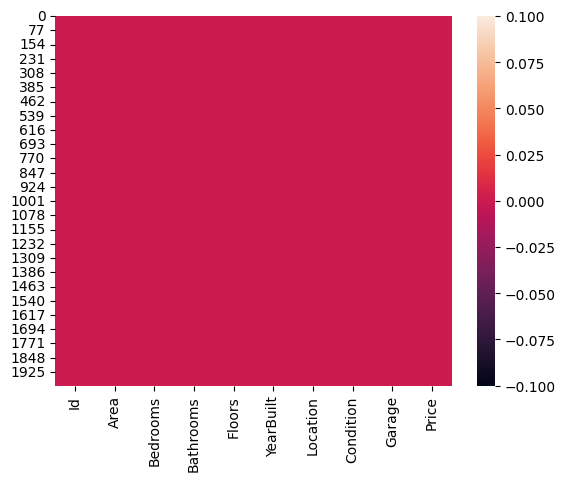

In [ ]:
sns.heatmap(df.isnull())

Text(0.5, 1.0, 'plot heatmap')

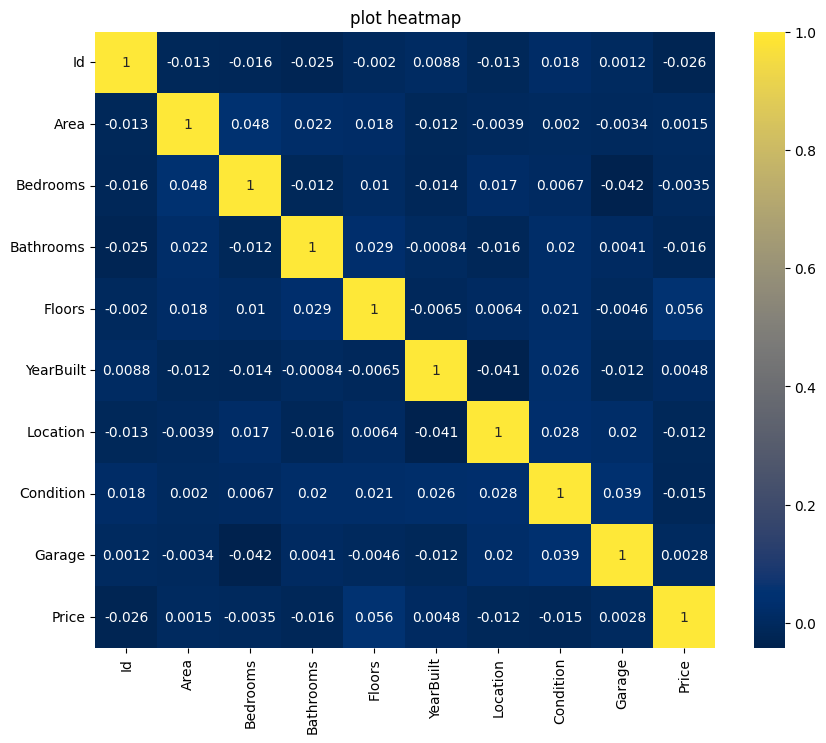

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="cividis")
plt.title("plot heatmap")

In [ ]:
df.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

Text(0.5, 1.0, 'dist plot for House Price')

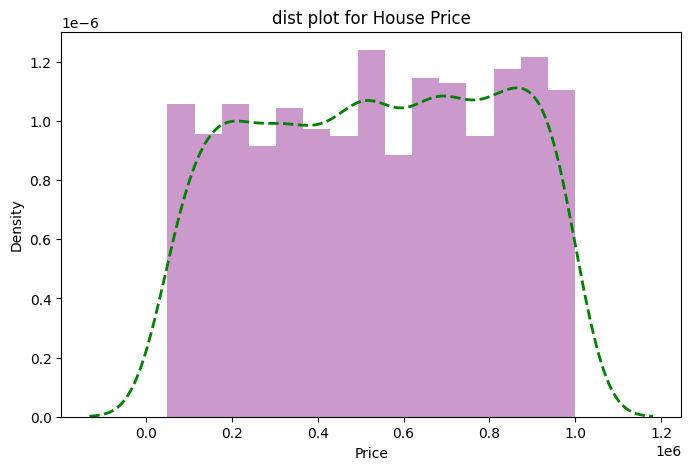

In [ ]:
#plot distplot

plt.figure(figsize=(8,5))
sns.distplot(df["Price"],color="purple",bins=15,kde_kws={"color":"g","linewidth":2,"linestyle":"--"})
plt.title("dist plot for House Price")

Text(0, 0.5, 'Area')

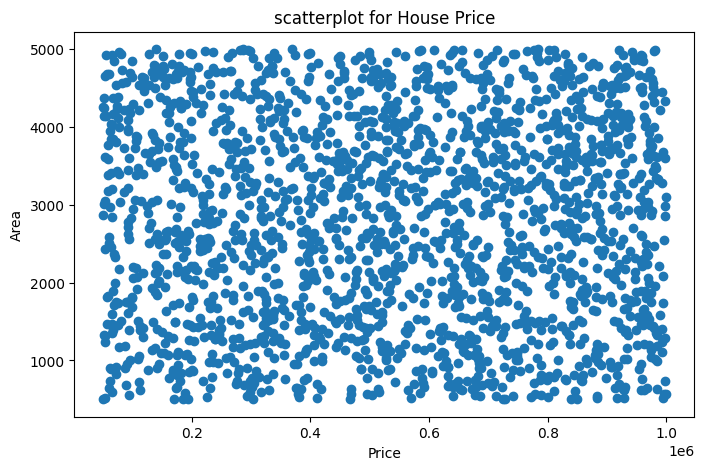

In [ ]:
#scatter plot

plt.figure(figsize=(8,5))
plt.scatter(df["Price"],df["Area"],cmap="rainbow")
plt.title("scatterplot for House Price")
plt.xlabel("Price")
plt.ylabel("Area")

Text(0, 0.5, 'Price')

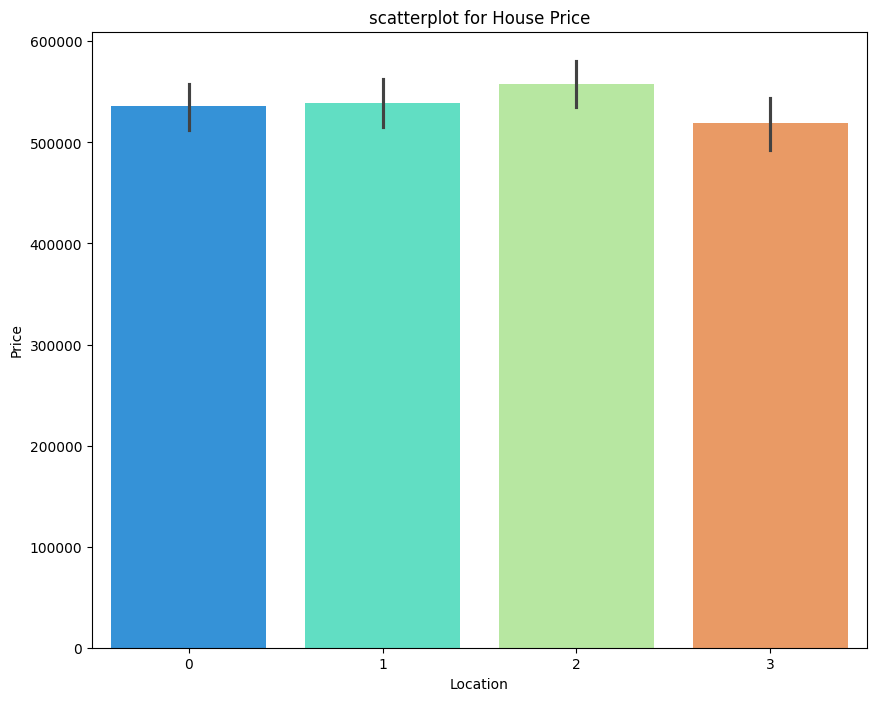

In [ ]:
#bar plot

plt.figure(figsize=(10,8))
sns.barplot(x="Location",y="Price",data=df,palette="rainbow")
plt.title("scatterplot for House Price")
plt.xlabel("Location")
plt.ylabel("Price")

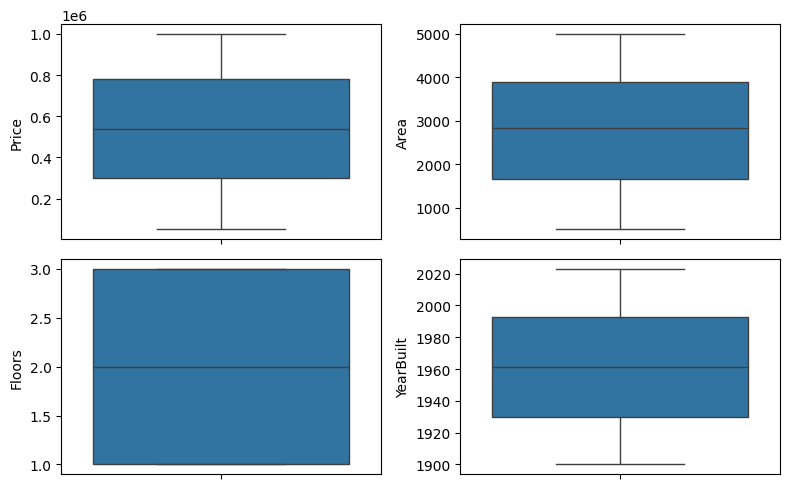

In [ ]:
#box plot
plt.figure(figsize=(8,5))
plt.subplot(2,2,1)
sns.boxplot(df["Price"])
plt.subplot(2,2,2)
sns.boxplot(df["Area"])
plt.subplot(2,2,3)
sns.boxplot(df["Floors"])
plt.subplot(2,2,4)
sns.boxplot(df["YearBuilt"])
plt.tight_layout()

# **1.RandomForestRegressor**

Random Forest Regressor is an ensemble learning method that combines multiple decision trees to predict continuous numerical values, improving accuracy and reducing overfitting.

In [ ]:
#split dataset
x=df.drop("Price",axis=1)
y=df["Price"]

In [ ]:
x.shape

(2000, 9)

In [ ]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
x_train.shape

(1500, 9)

In [ ]:
#feature_scaling

x_train_std=StandardScaler().fit_transform(x_train)
x_test_std=StandardScaler().fit_transform(x_test)

In [ ]:
#model training

model_rf=RandomForestRegressor()
model_rf.fit(x_train_std,y_train)

RandomForestRegressor()

In [ ]:
#predict
y_pred=model_rf.predict(x_test_std)

In [ ]:
#evaluate metrics

print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_pred))
print("r2_score:",r2_score(y_test,y_pred))

mean_absolute_error: 248550.33474000002
mean_squared_error: 82622963542.93394
r2_score: -0.05918682515499052


Text(0, 0.5, 'Predict data')

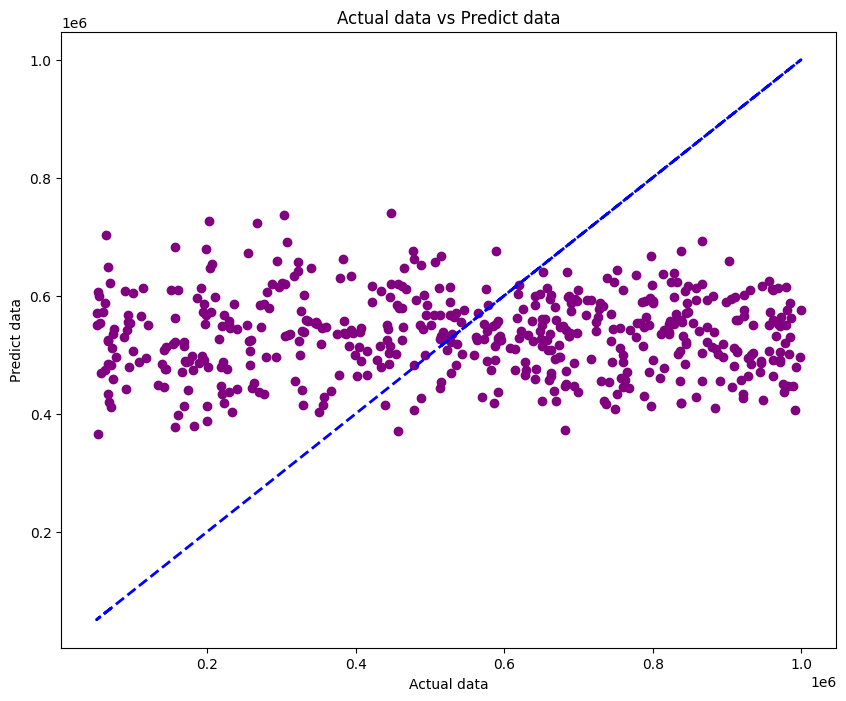

In [ ]:
#plot for RandomForestRegressor

plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred,color="purple")
plt.plot(y_test,y_test,color="b",linewidth=2,linestyle="--")
plt.title("Actual data vs Predict data")
plt.xlabel("Actual data")
plt.ylabel("Predict data")


# **2.LinearRegression**

It is a regression technique that predicts the output based on a linear (straight-line) relationship between the input variables and the output variable.

In [ ]:
#Model building

model_reg=LinearRegression()
model_reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
model_reg.intercept_

np.float64(325545.154388797)

In [ ]:
model_reg.coef_

array([-7.02648734e+00,  1.89660764e+00, -3.91235258e+02, -1.25797047e+04,
        2.65991588e+04,  1.01336111e+02, -3.65152601e+03, -3.83497982e+03,
        4.87472663e+03])

In [ ]:
#prediction
y_pred=model_reg.predict(x_test_std)

In [ ]:
#evaluate metrics

print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_pred))
print("r2_score:",model_reg.score(x_test,y_test))


mean_absolute_error: 302050.5784139152
mean_squared_error: 129309838528.67981
r2_score: -0.019175295427835914


Text(0.5, 1.0, 'Actual data vs Predict data')

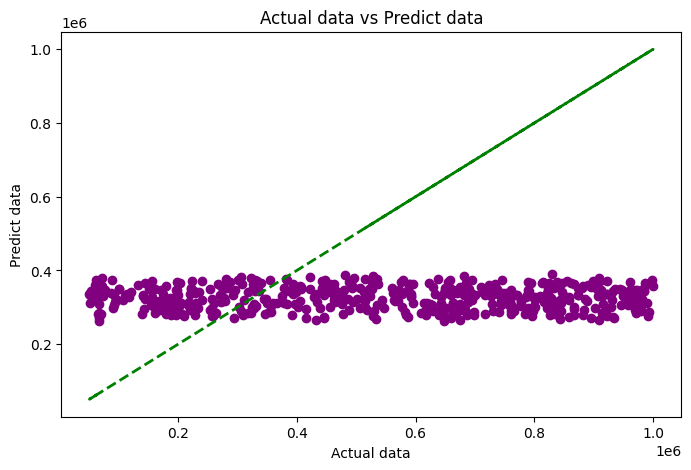

In [ ]:
#plot
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred,color="purple")
plt.plot(y_test,y_test,color="g",linewidth=2,linestyle="--")
plt.xlabel("Actual data")
plt.ylabel("Predict data")
plt.title("Actual data vs Predict data")

# **3.PolynomialRegression**

It is a type of regression that models nonlinear relationships between input and output variables by adding higher-degree polynomial terms (such as x², x³) to the linear equation.

In [ ]:
x1=df[["Area"]]
y1=df[["Price"]]

In [ ]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=42)

In [ ]:
#feature selection
degree=2
poly_features=PolynomialFeatures(degree=degree)
x_train_poly=poly_features.fit_transform(x_train)
x_test_poly=poly_features.fit_transform(x_test)

In [ ]:
#model building
model_lr=LinearRegression()
model_lr.fit(x_train_poly,y_train)

LinearRegression()

In [ ]:
model_lr.intercept_

array([546032.9559962])

In [ ]:
model_lr.coef_

array([[ 0.00000000e+00, -1.44278312e+01,  2.97724757e-03]])

In [ ]:
#prediction
y_pred=model_lr.predict(x_test_poly)

In [ ]:
#evaluate metrics
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_pred))
print("r2_score:",model_lr.score(x_test_poly,y_test))

mean_absolute_error: 243648.78517482214
mean_squared_error: 78514012461.26794
r2_score: -0.006512040031294797


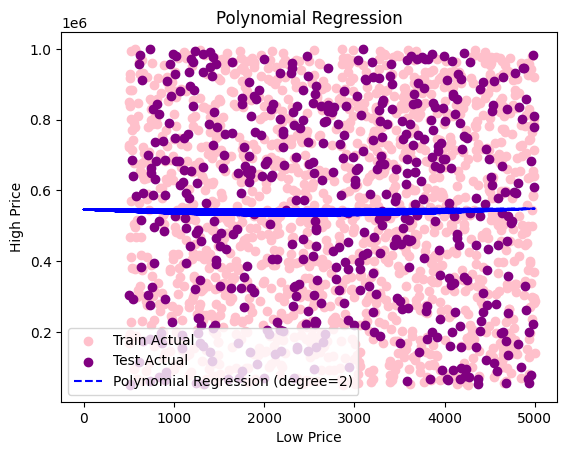

In [ ]:
#plot
X_plot = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
y_plot = model_lr.predict(poly_features.transform(X_plot))
plt.scatter(x_train, y_train, color='pink', label='Train Actual')
plt.scatter(x_test, y_test, color='purple', label='Test Actual')
plt.plot(X_plot, y_plot, color='blue', label=f'Polynomial Regression (degree={degree})',linestyle="--")
plt.xlabel("Low Price")
plt.ylabel("High Price")
plt.title('Polynomial Regression')
plt.legend()
plt.show()

## **4.LogisticRegression**

Although it is called “regression,” Logistic Regression is actually used for binary classification problems, where the output is 0 or 1.

In [ ]:
#load dataset
data="House Price Prediction Dataset.csv"
df=pd.read_csv(data)
df.head()


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [ ]:
df["Target"]=df["Price"].apply(lambda x:1 if x>250000 else 0)

In [ ]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Target
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919,0
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998,1
2,3,3592,2,2,3,1938,Downtown,Good,No,266746,1
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020,0
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056,1


In [ ]:
#1-->High Price,0-->Low Price
df["Target"].value_counts()

,count
Target,
1,1597
0,403


Text(0.5, 1.0, 'Countplot for targetvalues')

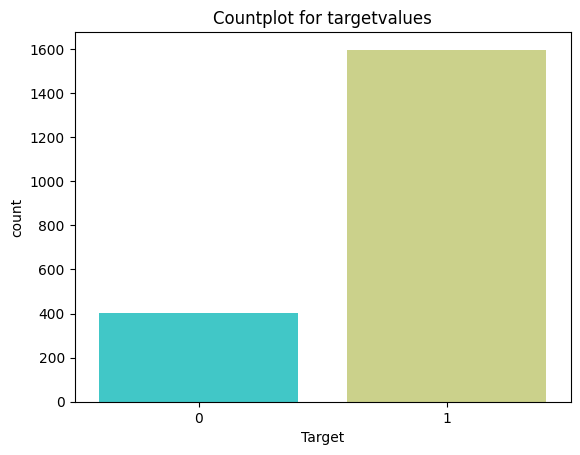

In [ ]:
#Plot for target values

sns.countplot(x="Target",data=df,palette="rainbow")
plt.title("Countplot for targetvalues")

In [ ]:
#labelencoded
le=LabelEncoder()
df["Location"]=le.fit_transform(df["Location"])
df["Condition"]=le.fit_transform(df["Condition"])
df["Garage"]=le.fit_transform(df["Garage"])
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Target
0,1,1360,5,4,3,1970,0,0,0,149919,0
1,2,4272,5,4,3,1958,0,0,0,424998,1
2,3,3592,2,2,3,1938,0,2,0,266746,1
3,4,966,4,2,2,1902,2,1,1,244020,0
4,5,4926,1,4,2,1975,0,1,1,636056,1


Text(0.5, 1.0, 'House Price Prediction')

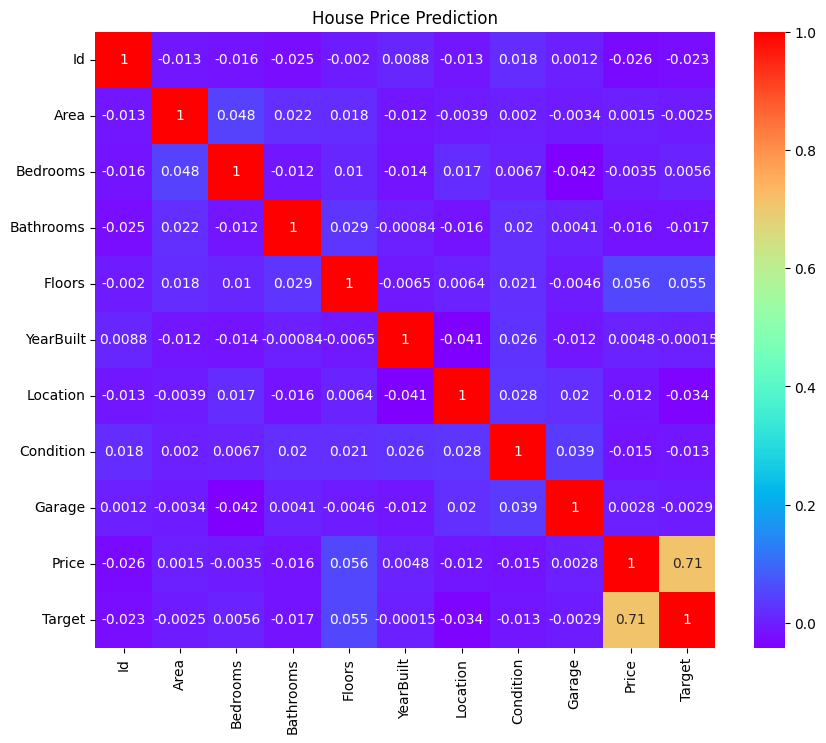

In [ ]:
#heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="rainbow")
plt.title("House Price Prediction")

In [ ]:
x=df.drop("Target",axis=1)
y=df["Target"]

In [ ]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
x_train.shape

(1500, 10)

In [ ]:
x_test.shape

(500, 10)

In [ ]:
#feature_scaling
x_train_std=StandardScaler().fit_transform(x_train)
x_test_std=StandardScaler().fit_transform(x_test)

In [ ]:
#model training
model=LogisticRegression()
rfe=RFE(model,n_features_to_select=9)
rfe.fit(x_train_std,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=9)

In [ ]:
#select features
select_features=x.columns[rfe.support_]
select_features

Index(['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location',
       'Condition', 'Garage', 'Price'],
      dtype='object')

In [ ]:
#train and test
x_train_rfe=rfe.transform(x_train_std)
x_test_rfe=rfe.transform(x_test_std)

In [ ]:
#build model
model_l=LogisticRegression()
model_l.fit(x_train_rfe,y_train)

LogisticRegression()

In [ ]:
#prediction
y_pred=model_l.predict(x_test_rfe)

In [ ]:
#evaluate metrics

print("confusion_matrics:",confusion_matrix(y_test,y_pred))
print("accuracy_score:",np.round(accuracy_score(y_test,y_pred),2))
print("classification_report:",classification_report(y_test,y_pred))

confusion_matrics: [[101   0]
 [  3 396]]
accuracy_score: 0.99
classification_report:               precision    recall  f1-score   support

           0       0.97      1.00      0.99       101
           1       1.00      0.99      1.00       399

    accuracy                           0.99       500
   macro avg       0.99      1.00      0.99       500
weighted avg       0.99      0.99      0.99       500



Text(50.722222222222214, 0.5, 'True label')

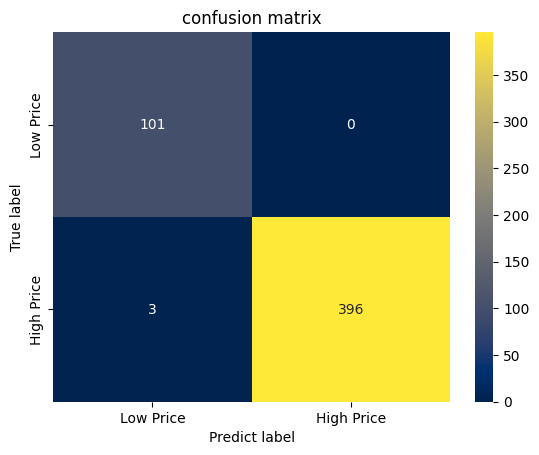

In [ ]:
#plot for confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="cividis",xticklabels=["Low Price","High Price"],yticklabels=["Low Price","High Price"])
plt.title("confusion matrix")
plt.xlabel("Predict label")
plt.ylabel("True label")

## **5.DecisionTreeClassifier**

Decision Tree Classifier is a supervised learning algorithm that uses a tree-like model of decisions and their possible outcomes to classify data into predefined categories or classes.



In [ ]:
#model building
dt_model=DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    random_state=42
)
dt_model.fit(x_train_std,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#prediction
y_pred=dt_model.predict(x_test_std)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#evaluate metrix
print("confusion_matrix:",confusion_matrix(y_test,y_pred))
print("accuracy_score:",np.round(accuracy_score(y_test,y_pred),2))
print("classification_report:",classification_report(y_test,y_pred))

confusion_matrix: [[101   0]
 [  6 393]]
accuracy_score: 0.99
classification_report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97       101
           1       1.00      0.98      0.99       399

    accuracy                           0.99       500
   macro avg       0.97      0.99      0.98       500
weighted avg       0.99      0.99      0.99       500



Text(50.722222222222214, 0.5, 'True label')

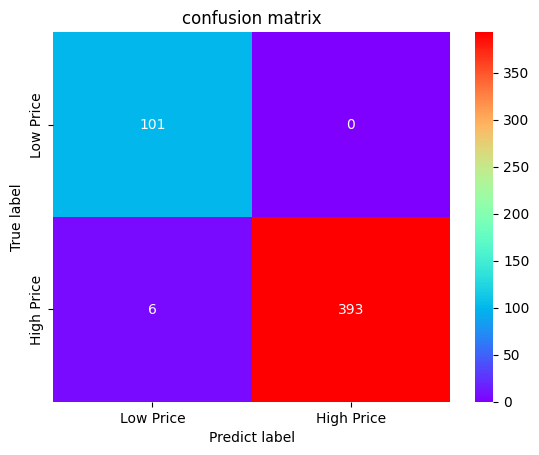

In [ ]:
#plot for confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="rainbow",xticklabels=["Low Price","High Price"],yticklabels=["Low Price","High Price"])
plt.title("confusion matrix")
plt.xlabel("Predict label")
plt.ylabel("True label")

[Text(0.5, 0.75, 'Price <= -1.033\ngini = 0.322\nsamples = 1500\nvalue = [302, 1198]\nclass = High Price'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 302\nvalue = [302, 0]\nclass = Low Price'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1198\nvalue = [0, 1198]\nclass = High Price'),
 Text(0.625, 0.5, '  False')]

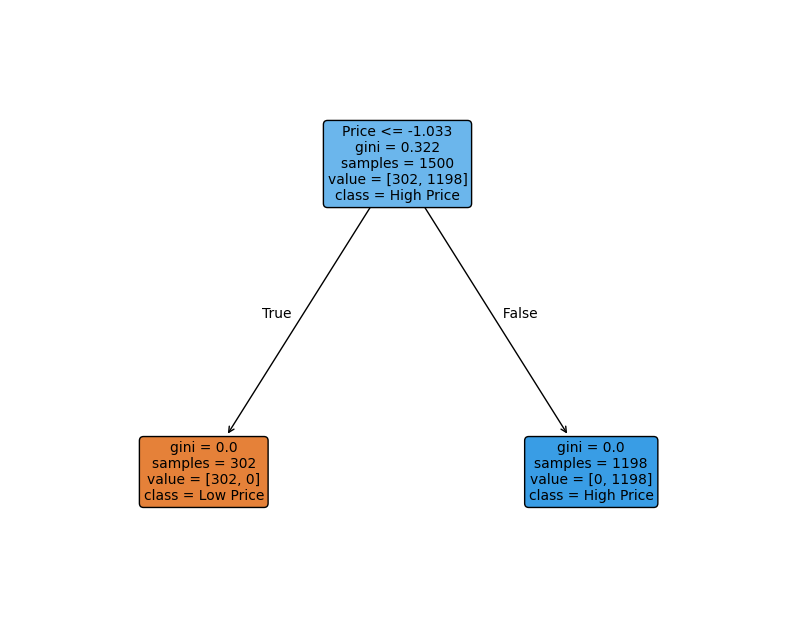

In [ ]:
#decision tree plot
plt.figure(figsize=(10,8))
plot_tree(
  dt_model,
  feature_names=x.columns,
  class_names=["Low Price","High Price"],
  filled=True,
  fontsize=10,
  rounded=True
)

# **6.KNeighborsClassifier**

K-Nearest Neighbors (KNN) Classifier is a supervised learning algorithm that classifies a data point by comparing it to the ‘K’ closest data points in the training set and assigning the most common class among them.

In [ ]:
#elbow method
error_rate=[]
k_range=range(1,21)

for k in k_range:
  model_knn=KNeighborsClassifier(n_neighbors=k)
  model_knn.fit(x_train_std,y_train)
  y_pred=model_knn.predict(x_test_std)
  error=1-accuracy_score(y_test,y_pred)
  error_rate.append(error)

In [ ]:
print(error_rate)

[0.124, 0.128, 0.124, 0.128, 0.118, 0.10599999999999998, 0.11199999999999999, 0.10399999999999998, 0.10599999999999998, 0.11399999999999999, 0.12, 0.11399999999999999, 0.124, 0.11199999999999999, 0.128, 0.11199999999999999, 0.13, 0.128, 0.14600000000000002, 0.134]


Text(0, 0.5, 'error_rate')

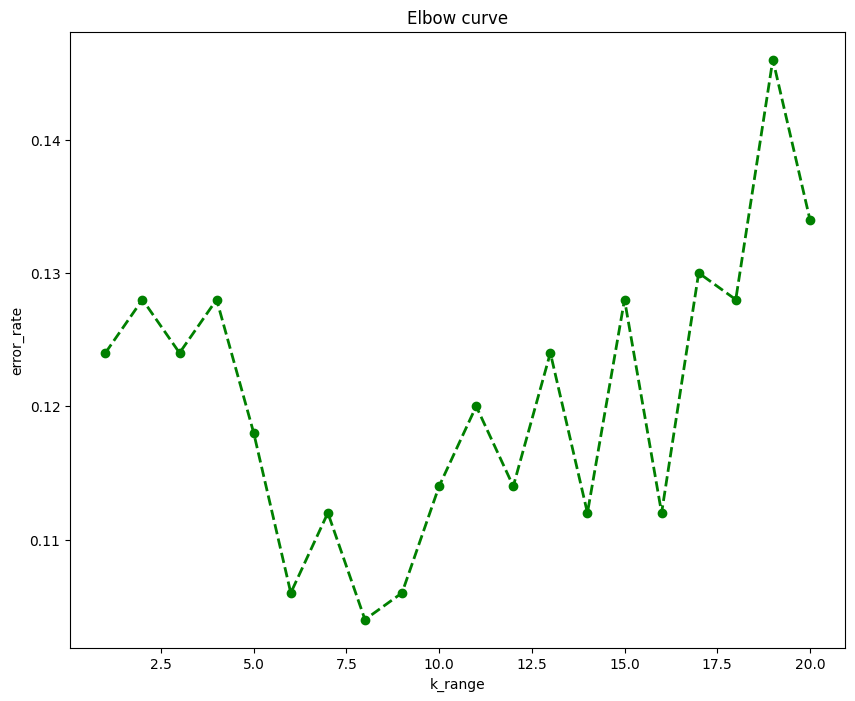

In [ ]:
#plot elbow curve
plt.figure(figsize=(10,8))
plt.plot(k_range,error_rate,color="Green",linestyle="--",linewidth=2,marker="o")
plt.title("Elbow curve")
plt.xlabel("k_range")
plt.ylabel("error_rate")

In [ ]:
#find k values from elbow
optimal_k_value=error_rate.index(min(error_rate))+1
optimal_k_value

8

In [ ]:
#model building
model_knn=KNeighborsClassifier()
model_knn.fit(x_train_std,y_train)

KNeighborsClassifier()

In [ ]:
#predict
y_pred=model_knn.predict(x_test_std)

In [ ]:
#evaluate metrics
print("confusion_matrix:",confusion_matrix(y_test,y_pred))
print("accuracy_score:",np.round(accuracy_score(y_test,y_pred),2))
print("classification_report:",classification_report(y_test,y_pred))

confusion_matrix: [[ 58  43]
 [ 16 383]]
accuracy_score: 0.88
classification_report:               precision    recall  f1-score   support

           0       0.78      0.57      0.66       101
           1       0.90      0.96      0.93       399

    accuracy                           0.88       500
   macro avg       0.84      0.77      0.80       500
weighted avg       0.88      0.88      0.87       500



Text(50.722222222222214, 0.5, 'True label')

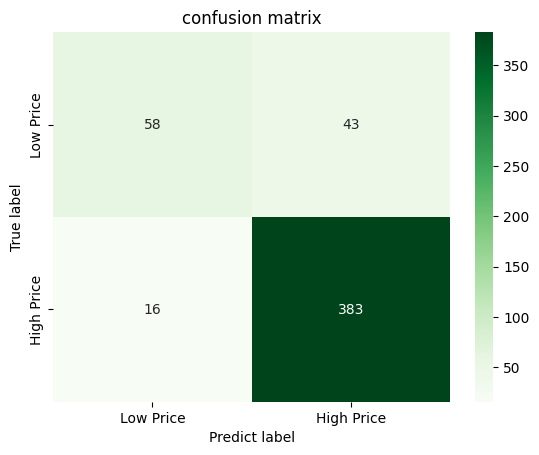

In [ ]:
#plot confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Greens",xticklabels=["Low Price","High Price"],yticklabels=["Low Price","High Price"])
plt.title("confusion matrix")
plt.xlabel("Predict label")
plt.ylabel("True label")

## **7.SVM**

Support Vector Machine (SVM) is a Supervised Learning algorithm that finds the best boundary (hyperplane) to separate different classes of data.

In [ ]:
#Model building
kernels=["linear","poly","sigmoid","rbf"]

for kernel in kernels:
  print(f"svm-{kernel}")
  if kernel=="poly":
    model=SVC(kernel=kernel,degree=2)
  else:
    model=SVC(kernel=kernel)

    #train the model
    model.fit(x_train_std,y_train)

    #predict data
    y_pred=model.predict(x_test_std)

    #evaluate metrics
    print("confusion_matrix:",confusion_matrix(y_test,y_pred))
    print("accuracy_score:",np.round(accuracy_score(y_test,y_pred),2))
    print("classification_report:",classification_report(y_test,y_pred))



svm-linear
confusion_matrix: [[101   0]
 [  4 395]]
accuracy_score: 0.99
classification_report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       101
           1       1.00      0.99      0.99       399

    accuracy                           0.99       500
   macro avg       0.98      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500

svm-poly
svm-sigmoid
confusion_matrix: [[ 97   4]
 [  6 393]]
accuracy_score: 0.98
classification_report:               precision    recall  f1-score   support

           0       0.94      0.96      0.95       101
           1       0.99      0.98      0.99       399

    accuracy                           0.98       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.98      0.98      0.98       500

svm-rbf
confusion_matrix: [[ 96   5]
 [  5 394]]
accuracy_score: 0.98
classification_report:               precision    recall  f1-score   suppo

Text(50.722222222222214, 0.5, 'accurate label')

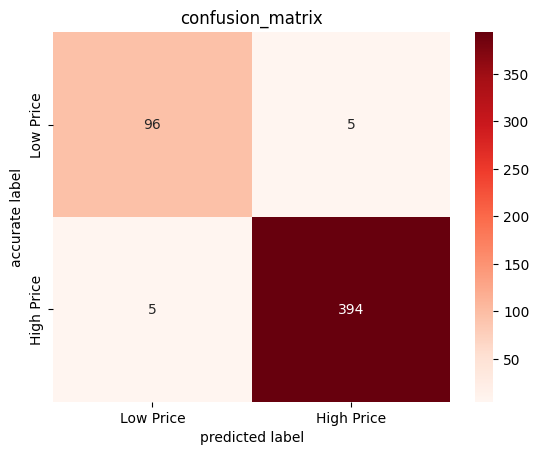

In [ ]:
#plot for confusion matrix

sns.heatmap(confusion_matrix(y_test,y_pred),fmt="d",annot=True,cmap="Reds",xticklabels=["Low Price","High Price"],yticklabels=["Low Price","High Price"])
plt.title("confusion_matrix")
plt.xlabel("predicted label")
plt.ylabel("accurate label")

# **8.NaiveBayes**

Naive Bayes Classifier is a Supervised Learning algorithm based on Bayes’ Theorem that predicts the class of data by calculating the probability of each class, assuming all features are independent.

In [ ]:
#model build
model_nb=GaussianNB()
model_nb.fit(x_train_std,y_train)

GaussianNB()

In [ ]:
#predict data
y_pred=model_nb.predict(x_test_std)

In [ ]:
#evaluate metrics

print("confusion_matrix:",confusion_matrix(y_test,y_pred))
print("accuracy_score:",np.round(accuracy_score(y_test,y_pred),2))
print("classification_report:",classification_report(y_test,y_pred))


confusion_matrix: [[101   0]
 [  7 392]]
accuracy_score: 0.99
classification_report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97       101
           1       1.00      0.98      0.99       399

    accuracy                           0.99       500
   macro avg       0.97      0.99      0.98       500
weighted avg       0.99      0.99      0.99       500



Text(50.722222222222214, 0.5, 'true label')

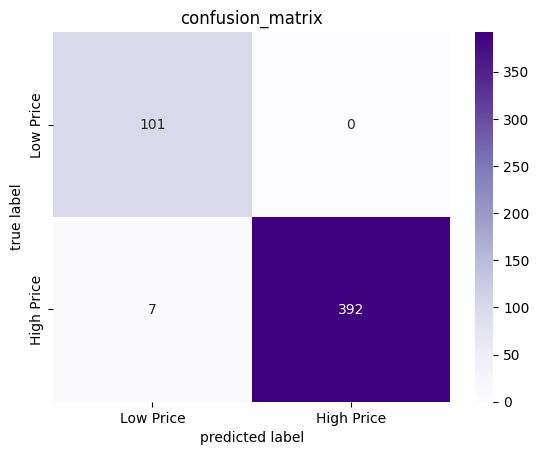

In [ ]:
#plot for confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Purples",xticklabels=["Low Price","High Price"],yticklabels=["Low Price","High Price"])
plt.title("confusion_matrix")
plt.xlabel("predicted label")
plt.ylabel("true label")

# **9.RandomForestClassifier**

Random Forest Classifier is a Supervised Learning algorithm that combines multiple decision trees to classify data more accurately and reduce overfitting.

In [ ]:
#model build
model_rfc=RandomForestClassifier(n_estimators=100,criterion="gini",random_state=42)
model_rfc.fit(x_train_std,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#predict
y_pred_rfc=model_rfc.predict(x_test_std)

In [ ]:
#evaluate metrics
print("confusion_matrix:",confusion_matrix(y_test,y_pred_rfc))
print("accuracy_score:",np.round(accuracy_score(y_test,y_pred_rfc),2))
print("classification_report:",classification_report(y_test,y_pred_rfc))

confusion_matrix: [[101   0]
 [  6 393]]
accuracy_score: 0.99
classification_report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97       101
           1       1.00      0.98      0.99       399

    accuracy                           0.99       500
   macro avg       0.97      0.99      0.98       500
weighted avg       0.99      0.99      0.99       500



Text(50.722222222222214, 0.5, 'true label')

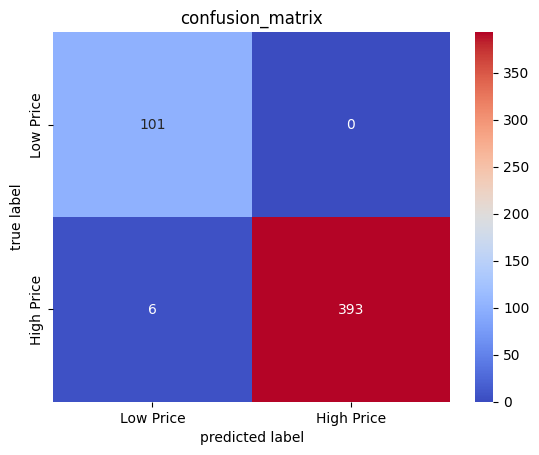

In [ ]:
#plot for confusion matrix

sns.heatmap(confusion_matrix(y_test,y_pred_rfc),annot=True,fmt="d",cmap="coolwarm",xticklabels=["Low Price","High Price"],yticklabels=["Low Price","High Price"])
plt.title("confusion_matrix")
plt.xlabel("predicted label")
plt.ylabel("true label")

## **10.AdaBoostClassifier**

AdaBoost Classifier (Adaptive Boosting) is a Supervised Learning algorithm that combines multiple weak learners (usually decision trees) to form a strong classifier with improved accuracy.

In [ ]:
#model building
model_abc=AdaBoostClassifier()
model_abc.fit(x_train_std,y_train)

AdaBoostClassifier()

In [ ]:
#predict
y_pred=model_abc.predict(x_test_std)

In [ ]:
#evaluate metrics
print("confusion_matrix:",confusion_matrix(y_test,y_pred))
print("accuracy_score:",np.round(accuracy_score(y_test,y_pred),2))
print("classification_report:",classification_report(y_test,y_pred))

confusion_matrix: [[101   0]
 [  6 393]]
accuracy_score: 0.99
classification_report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97       101
           1       1.00      0.98      0.99       399

    accuracy                           0.99       500
   macro avg       0.97      0.99      0.98       500
weighted avg       0.99      0.99      0.99       500



Text(50.722222222222214, 0.5, 'true label')

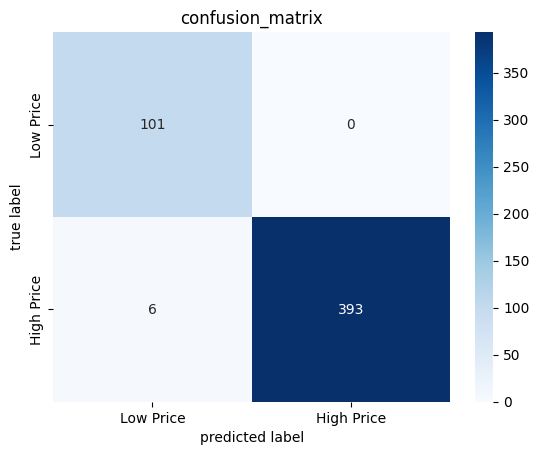

In [ ]:
#plot for confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Blues",xticklabels=["Low Price","High Price"],yticklabels=["Low Price","High Price"])
plt.title("confusion_matrix")
plt.xlabel("predicted label")
plt.ylabel("true label")

## ***11.XGBoostClassifier***

XGBoost Classifier (Extreme Gradient Boosting) is a Supervised Learning algorithm that builds an ensemble of weak learners (usually decision trees) in a sequential way to achieve high accuracy and fast performance.

In [ ]:
#model building
model_xg=XGBClassifier(n_estimators=100,random_state=42)
model_xg.fit(x_train_std,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#prediction
y_pred=model_xg.predict(x_test_std)

In [ ]:
#evaluate metrics
print("confusion_matrix:",confusion_matrix(y_test,y_pred))
print("accuracy_score:",np.round(accuracy_score(y_test,y_pred),2))
print("classification_report:",classification_report(y_test,y_pred))

confusion_matrix: [[101   0]
 [  4 395]]
accuracy_score: 0.99
classification_report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       101
           1       1.00      0.99      0.99       399

    accuracy                           0.99       500
   macro avg       0.98      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



Text(50.722222222222214, 0.5, 'true label')

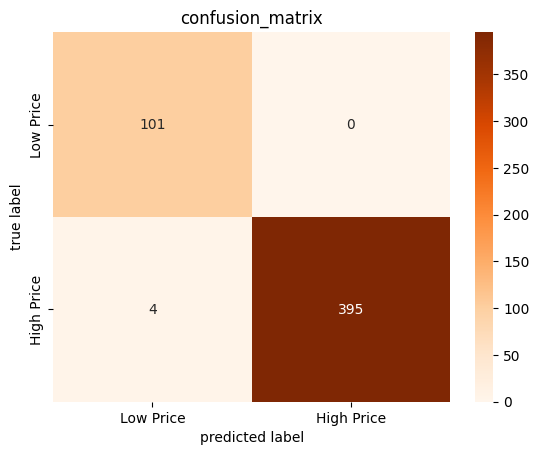

In [ ]:
#plot for confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Oranges",xticklabels=["Low Price","High Price"],yticklabels=["Low Price","High Price"])
plt.title("confusion_matrix")
plt.xlabel("predicted label")
plt.ylabel("true label")

# **UNSUPERVISED LEARNING**

Unsupervised Learning is a type of Machine Learning where the model is trained on unlabeled data and automatically discovers hidden patterns, structures, or groupings within the dataset.

## **1.Clustering**

Clustering is an unsupervised learning method that automatically groups similar data points together based on their features. It helps discover patterns and relationships in data without using labels.

In [ ]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(42)
num_customers = 300

data={
    "CustomerId": np.arange(1,num_customers+1),
    "Floors": np.random.randint(1,15,size=num_customers),
    "Area":np.random.randint(100,5000,size=num_customers),
    "Price":np.random.randint(100000,1000000,size=num_customers)

    }

In [ ]:
DF=pd.DataFrame(data)
DF

,CustomerId,Floors,Area,Price
0,1,7,1469,887494
1,2,4,2086,708364
2,3,13,246,189780
3,4,11,3319,252617
4,5,8,3011,645977
...,...,...,...,...
295,296,6,3038,761614
296,297,13,3736,779574
297,298,3,3322,598870
298,299,4,1267,311791


In [ ]:
DF.shape

(300, 4)

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CustomerId  300 non-null    int64
 1   Floors      300 non-null    int64
 2   Area        300 non-null    int64
 3   Price       300 non-null    int64
dtypes: int64(4)
memory usage: 9.5 KB


In [ ]:
#feature selection

x=DF[["Floors","Area","Price"]]

In [ ]:
#scaling datas

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [ ]:
#wcss --> with in clusters sum of distance

from sklearn.cluster import KMeans
wcss=[]
k_range = range(2,11)

for k in k_range:
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

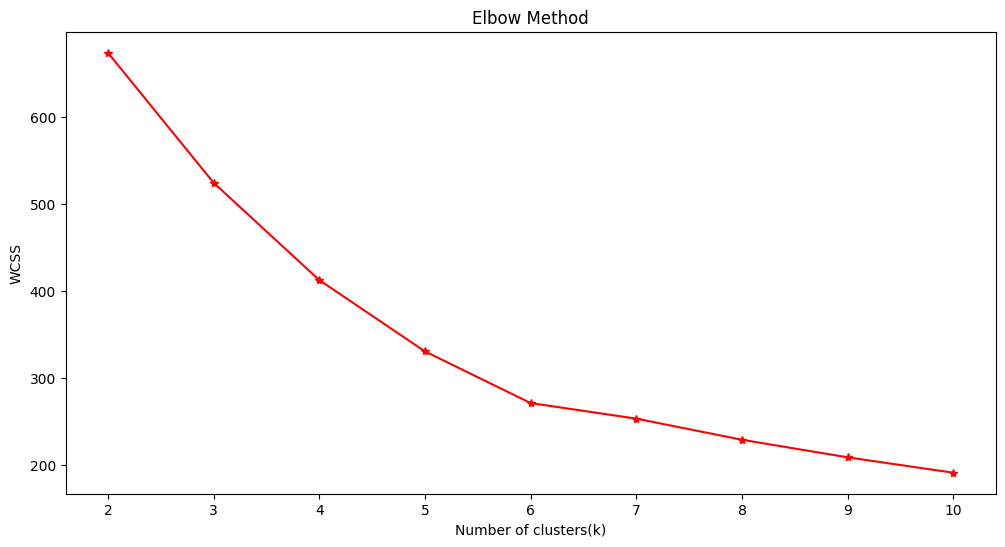

In [ ]:
#plot

plt.figure(figsize=(12,6))
plt.plot(k_range,wcss,marker="*",color="red")
plt.xlabel("Number of clusters(k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [ ]:
#evaluate metrics

from sklearn.metrics import silhouette_score

sil_score=[]
k_range=range(2,11)

for k in k_range:
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(x_scaled)
  y_pred = kmeans.predict(x_scaled)
  sil_score.append(silhouette_score(x_scaled,y_pred))

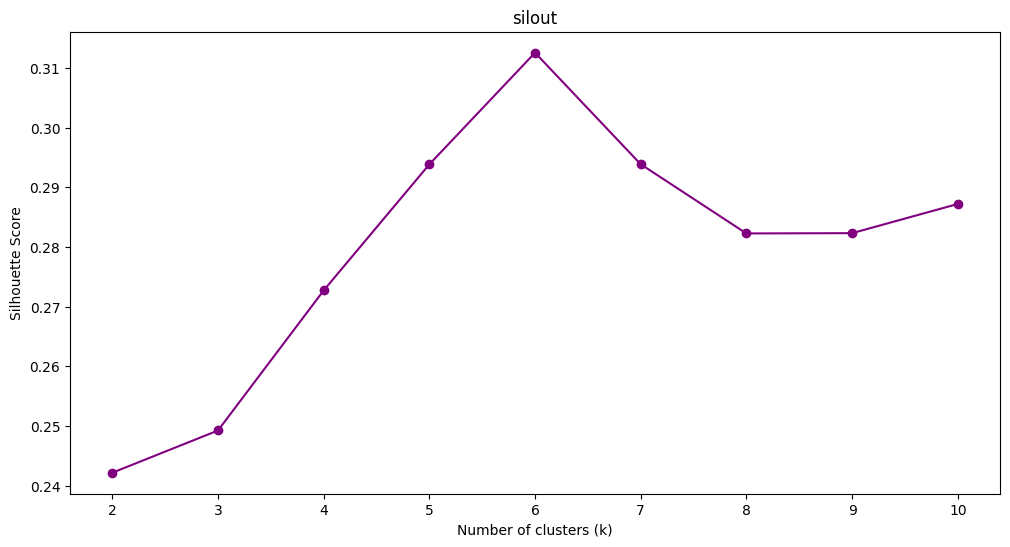

In [ ]:
#plot

plt.figure(figsize=(12,6))
plt.plot(k_range,sil_score,marker="o",color="purple")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("silout")
plt.show()

In [ ]:
k_best=k_range[np.argmax(sil_score)]
k_best

6

In [ ]:
k_means=KMeans(n_clusters=k_best,random_state=42)
k_means.fit(x_scaled)

KMeans(n_clusters=6, random_state=42)

In [ ]:
labels=k_means.predict(x_scaled)

In [ ]:
DF["cluster_kmean"] = labels
DF.head()

,CustomerId,Floors,Area,Price,cluster_kmean
0,1,7,1469,887494,4
1,2,4,2086,708364,4
2,3,13,246,189780,1
3,4,11,3319,252617,3
4,5,8,3011,645977,0


In [ ]:
DF.columns

Index(['CustomerId', 'Floors', 'Area', 'Price', 'cluster_kmean'], dtype='object')

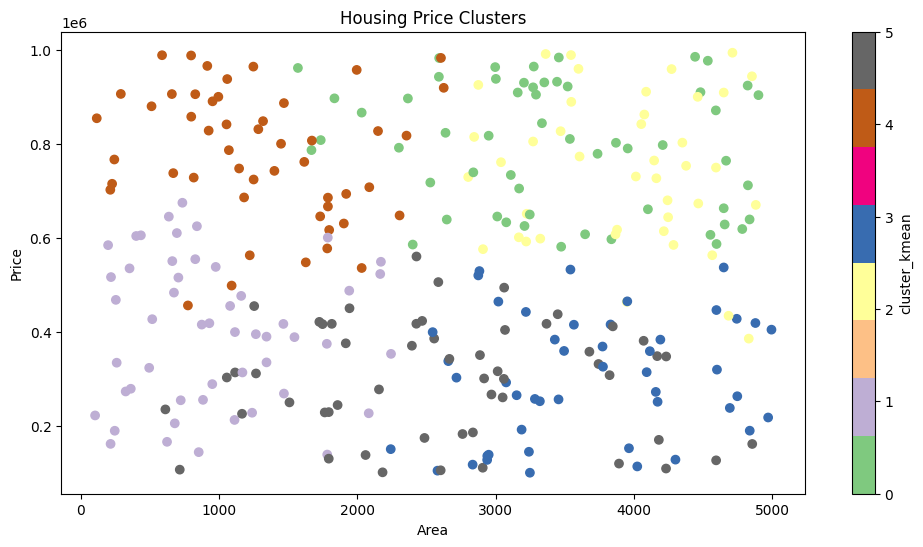

In [ ]:
#plot the clusters

plt.figure(figsize=(12,6))
plt.scatter(DF["Area"],DF["Price"],c=DF["cluster_kmean"],cmap="Accent")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Housing Price Clusters")
plt.colorbar(label="cluster_kmean")
plt.show()

## **DBSCAN**

DBSCAN is a density-based clustering algorithm that groups closely packed data points into clusters and identifies points in low-density regions as noise or outliers.

In [ ]:
#Import libraries

from sklearn.cluster import DBSCAN

In [ ]:
#model

dbscan = DBSCAN(eps=2,min_samples=5)
dbscan.fit(x_scaled)

DBSCAN(eps=2)

In [ ]:
#predict

db_pred = dbscan.labels_

In [ ]:
DF["db_clusters"] = db_pred
DF.head()

,CustomerId,Floors,Area,Price,cluster_kmean,db_clusters
0,1,7,1469,887494,4,0
1,2,4,2086,708364,4,0
2,3,13,246,189780,1,0
3,4,11,3319,252617,3,0
4,5,8,3011,645977,0,0


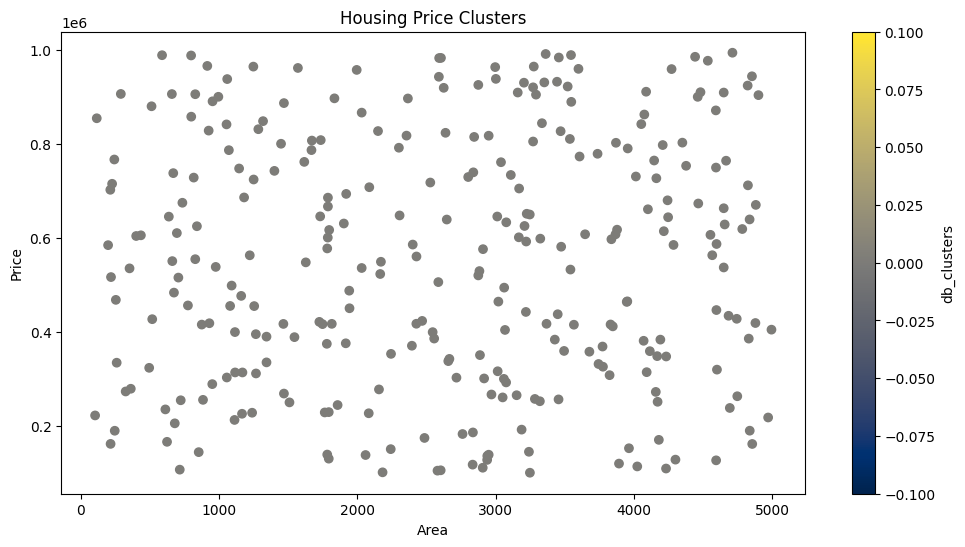

In [ ]:
#plot

plt.figure(figsize=(12,6))
plt.scatter(DF["Area"],DF["Price"],c=DF["db_clusters"],cmap="cividis")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Housing Price Clusters")
plt.colorbar(label="db_clusters")
plt.show()

# **PCA**

PCA (Principal Component Analysis) is an unsupervised technique that reduces the number of features by keeping only the most important information, making data simpler and easier to analyze.

In [ ]:
#load dataset

df=pd.read_csv("House Price Prediction Dataset.csv")
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [ ]:
df["Target"]=df["Price"].map(lambda x:1 if x>250000 else 0)
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Target
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919,0
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998,1
2,3,3592,2,2,3,1938,Downtown,Good,No,266746,1
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020,0
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056,1


In [ ]:
#labelencoded
le=LabelEncoder()
df["Location"]=le.fit_transform(df["Location"])
df["Condition"]=le.fit_transform(df["Condition"])
df["Garage"]=le.fit_transform(df["Garage"])
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Target
0,1,1360,5,4,3,1970,0,0,0,149919,0
1,2,4272,5,4,3,1958,0,0,0,424998,1
2,3,3592,2,2,3,1938,0,2,0,266746,1
3,4,966,4,2,2,1902,2,1,1,244020,0
4,5,4926,1,4,2,1975,0,1,1,636056,1


In [ ]:
x=df.drop("Target",axis=1)
y=df["Target"]

In [ ]:
#train_test_split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x.shape

(2000, 10)

In [ ]:
x_train.shape

(1600, 10)

In [ ]:
#scaling of data

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [ ]:
#pca for all components

from sklearn.decomposition import PCA

pca=PCA()
x_train_pca=pca.fit_transform(x_train_scaled)

In [ ]:
x_train_pca

array([[-1.38773247, -0.43879084,  1.48536121, ..., -1.20064512,
         1.34440572,  0.3670734 ],
       [ 0.17689935,  0.05368121, -0.65443631, ...,  0.87578164,
        -0.60123062, -1.11351691],
       [ 1.5701232 ,  0.94987415,  0.37484965, ...,  0.81752011,
         1.88496678, -0.80296381],
       ...,
       [-0.14916187,  0.48244588,  0.03663349, ..., -0.34591513,
        -0.87835533,  0.40198624],
       [ 0.29398627, -1.91336435,  0.916041  , ...,  1.61872691,
         0.10343757,  0.43594055],
       [-0.40238448,  1.34963432, -0.80189037, ..., -1.03665752,
        -0.29798476,  0.23164753]])

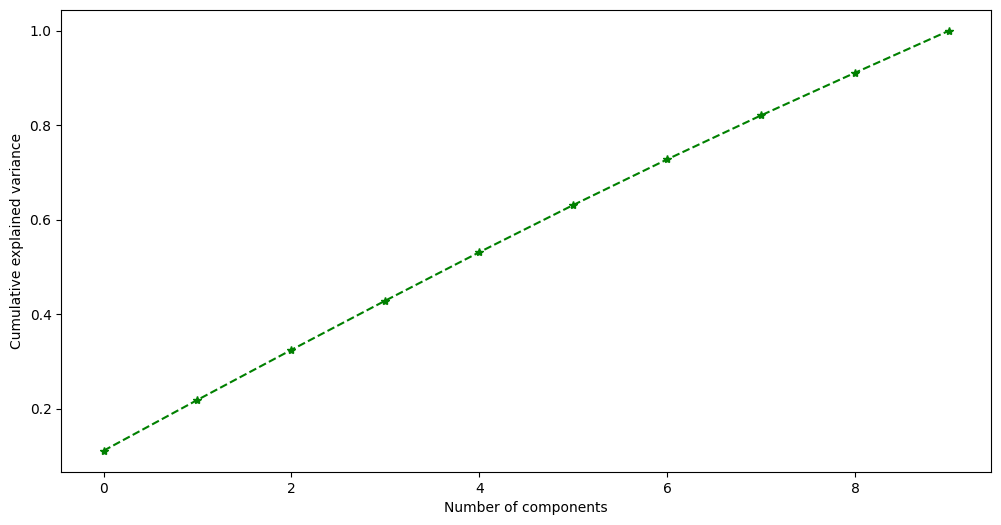

In [ ]:
#plot the variance ratio

plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker="*",linestyle="--",color="green")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [ ]:
#find no of components

variance_threshold=0.95
perfect_components=np.argmax(np.cumsum(pca.explained_variance_ratio_) >= variance_threshold) + 1
perfect_components

np.int64(10)

In [ ]:
#refit the pca

pca_final=PCA(n_components=perfect_components)

In [ ]:
x_train_pca1=pca_final.fit_transform(x_train_scaled)
x_test_pca1=pca_final.transform(x_test_scaled)

In [ ]:
#model training

from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier()
model_rf.fit(x_train_pca1,y_train)

RandomForestClassifier()

In [ ]:
#prediction

y_pred=model_rf.predict(x_test_pca1)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

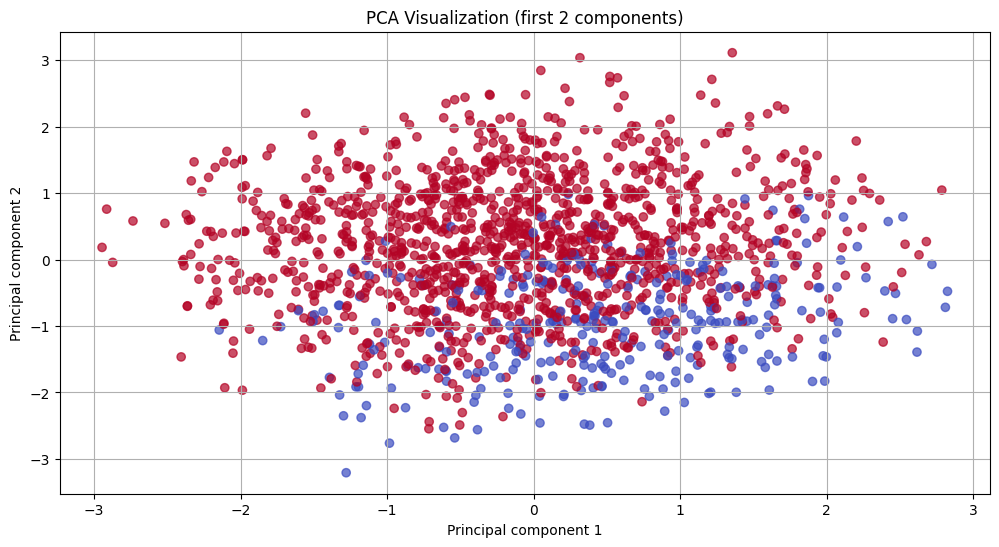

In [ ]:
#plot visualize 2D PCA

plt.figure(figsize=(12,6))
plt.scatter(x_train_pca1[:,0],x_train_pca1[:,1],c=y_train,cmap="coolwarm",alpha=0.7)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("PCA Visualization (first 2 components)")
plt.grid(True)
plt.show()

# **t-SNE**

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique used to visualize high-dimensional data in 2D or 3D by keeping similar points close together.

In [ ]:
#Import libraries

from time import time
from sklearn.manifold import TSNE

In [ ]:
start = time()
tsne=TSNE(n_components=2,perplexity=30,random_state=42)
x_train_tsne = tsne.fit_transform(x_train_scaled)
end = time()

In [ ]:
print(f"tsne run time: {end-start}")

tsne run time: 24.296692609786987


In [ ]:
 tsne_df = pd.DataFrame({
     "tsne1": x_train_tsne[:,0],
     "tsne2": x_train_tsne[:,1],
     "target": y_train
 })

In [ ]:
tsne_df

,tsne1,tsne2,target
968,-13.981849,-30.553625,1
240,-25.284391,21.834938,1
819,52.470692,4.001462,1
692,47.748512,1.809201,1
420,44.371468,-4.095555,1
...,...,...,...
1130,8.157991,0.786615,1
1294,29.483356,12.956709,1
860,-44.545261,-4.239152,1
1459,5.770510,0.091865,1


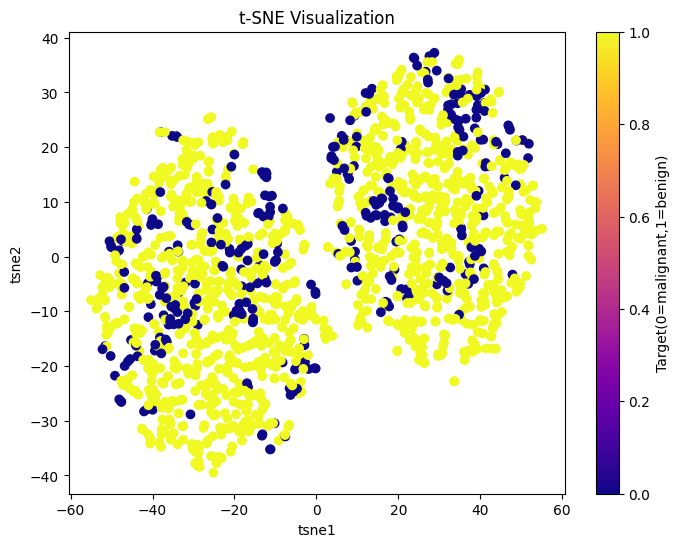

In [ ]:
#plot

plt.figure(figsize=(8,6))
plt.scatter(tsne_df["tsne1"],tsne_df["tsne2"],c=tsne_df["target"],cmap="plasma")
plt.colorbar(label="Target(0=malignant,1=benign)")
plt.title("t-SNE Visualization")
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.show()